# A notebook to demonstrate creation and handling of a small set of random THz mixture data. Then using them for multi-label classification

In [1]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
import numpy as np
from numpy import asarray
import pandas as pd
import math
import seaborn as sns  #heat map
import glob # batch processing of images


import matplotlib.font_manager as fm
import random
import sys
import os

from sklearn.datasets import make_regression
import tensorflow as tf
from sklearn.metrics import confusion_matrix    #confusion matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
# print(font_names)

from scipy import signal
from scipy import interpolate

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF

#Sklearn model saving and loading
from joblib import dump, load

if '../../' not in sys.path:
    sys.path.append('../../')

from aimos.spectral_datasets.THz_datasets import THz_data
from aimos.spectral_datasets.THz_mixture_data import THz_mixture_data
from aimos.misc.utils import simple_plotter


#Set random seed
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(42)  
tf.random.get_global_generator().reset_from_seed(42)
np.random.seed(42)
random.seed(42)


2022-07-15 21:27:28.046048: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-15 21:27:28.955757: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-07-15 21:27:28.985007: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: Quadro RTX 4000 computeCapability: 7.5
coreClock: 1.545GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 387.49GiB/s
2022-07-15 21:27:28.985066: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-15 21:27:28.990593: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-07-15 21:27:28.990686: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so

In [2]:
def concentrations_to_one_hot_encode(y):
    '''
    args:
    y, a vector containing the concentration values for each component.
    
    return vector containing binary one hot encoding
    '''
    
    
    y_ohe = y
    for i in range(y.shape[0]):

        for j in range(y.shape[1]):
            if y[i][j] > 0:
                y_ohe[i][j]=1    
                
    return y_ohe

# Create controlled test mixtures

In [3]:
m = THz_mixture_data(resolution=0.016, pressure='1 Torr', verbosity=True)
m.initiate_THz_mixture_data()

Components :  [[ 0  1  2  3  4  5  6  7  8  9 10 11 12]]
Components shape :  (1, 13)
Number of Compounds: 12
Number of Spectrum: 164
Total Number of Spectra: 1968
Sample Size of training data: 229
Rows discarded: 22
Resolution (1/cm) =  0.016
Loading CH3Cl... 
CH3Cl Data in Memory 
Loading CH3OH... 
CH3OH Data in Memory 
Loading HCOOH... 
HCOOH Data in Memory 
Loading H2CO... 
H2CO Data in Memory 
Loading H2S... 
H2S Data in Memory 
Loading SO2... 
SO2 Data in Memory 
Loading OCS... 
OCS Data in Memory 
Loading HCN... 
HCN Data in Memory 
Loading CH3CN... 
CH3CN Data in Memory 
Loading HNO3... 
HNO3 Data in Memory 
Loading C2H5OH... 
C2H5OH Data in Memory 
Loading CH3CHO... 
CH3CHO Data in Memory 
shape of spectra (features): (1968, 229)
shape of labels: (1968,)
labels :  [' ', '', 'Diluent', '$C_2H_5OH$', '$CH_3CHO$', '$CH_3Cl$', '$CH_3CN$', '$CH_3OH$', '$H_2CO$', '$H_2S$', '$HCN$', '$HCOOH$', '$HNO_3$', '$OCS$', '$SO_2$']
Basis shape: (12, 229)


In [5]:
m.make_controlled_test_mixtures(equal_amount = 100, tweleve_component_amount=100,
                                abs_threshold=0.001, test_Species_Abs_Threshold=0.0001,
                                save_to_file = False)


 ...generating 1-component mixtures data...


 ...generating 2-component mixtures data...


 ...generating 3-component mixtures data...


 ...generating 4-component mixtures data...


 ...generating 5-component mixtures data...


 ...generating 6-component mixtures data...


 ...generating 7-component mixtures data...


 ...generating 8-component mixtures data...


 ...generating 9-component mixtures data...


 ...generating 10-component mixtures data...


 ...generating 11-component mixtures data...


 ...generating 12-component mixtures data...

Time elasped: 67.017
Total number of test mixtures :  1200

Combined test simulated mixtures

No. of test mixtures:  1200
test_targets data type:  object
test_targets data shape:  (1200, 12)
Time elaspsed:  143.76
numpy random state:  4170550853
test_mixtures data type:  object
test_mixtures shape:  (1197, 1, 229)
test_targets data type:  object
test_targets shape:  (1197, 12)
Adjusted n_test_mixtures:  1197
Total spectra with weak component

# view attributes of the controlled test mixtures data

In [6]:
print('number of test mixtures: ',m.n_test_mixtures)
print('test mixtures shape: ',m.test_mixtures.shape)
print('test targets shape: ',m.test_targets.shape)
print('test dilutions shape: ',m.test_dilution.shape)

print('resolution: ',m.resolution)
print('frequencies in the data', m.frequencies)

print('pressure: ',m.pressure) 
print('labels: ',m.labels) 
print('label_id: ',m.label_id) 

print('number of features: ',m.n_features) 
print('no. of compounds: ',m.n_compounds)
print('no. of spectrum per compound in pure THz data: ' ,m.n_spectrum)
print('no. of spectra in pure THz data: ',m.n_spectra) 

print('number ot maximum mixture components: ',m.n_mixture_component_max)
print('integer indices for each of the mixture components',m.components)


number of test mixtures:  1116
test mixtures shape:  (1116, 229)
test targets shape:  (1116, 12)
test dilutions shape:  (1200,)
resolution:  0.016
frequencies in the data [ 7.352  7.368  7.384  7.4    7.416  7.432  7.448  7.464  7.48   7.496
  7.512  7.528  7.544  7.56   7.576  7.592  7.608  7.624  7.64   7.656
  7.672  7.688  7.704  7.72   7.736  7.752  7.768  7.784  7.8    7.816
  7.832  7.848  7.864  7.88   7.896  7.912  7.928  7.944  7.96   7.976
  7.992  8.008  8.024  8.04   8.056  8.072  8.088  8.104  8.12   8.136
  8.152  8.168  8.184  8.2    8.216  8.232  8.248  8.264  8.28   8.296
  8.312  8.328  8.344  8.36   8.376  8.392  8.408  8.424  8.44   8.456
  8.472  8.488  8.504  8.52   8.536  8.552  8.568  8.584  8.6    8.616
  8.632  8.648  8.664  8.68   8.696  8.712  8.728  8.744  8.76   8.776
  8.792  8.808  8.824  8.84   8.856  8.872  8.888  8.904  8.92   8.936
  8.952  8.968  8.984  9.     9.016  9.032  9.048  9.064  9.08   9.096
  9.112  9.128  9.144  9.16   9.176  9.192  9.20

# assign controlled test mixtures data

In [7]:
X=m.test_mixtures

y=m.test_targets

print('X shape:', X.shape)
print('y shape:', y.shape)

print('X dtype:', X.dtype)
print('y dtype:', y.dtype)

X=X.astype(np.float)
y=y.astype(np.float)

print('After data type conversion')
print('X dtype:', X.dtype)
print('y dtype:', y.dtype)

X shape: (1116, 229)
y shape: (1116, 12)
X dtype: object
y dtype: object
After data type conversion
X dtype: float64
y dtype: float64


/tmp/ipykernel_303366/2528633035.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=X.astype(np.float)
/tmp/ipykernel_303366/2528633035.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=y.astype(np.float)


In [8]:
y_ohe = concentrations_to_one_hot_encode(y)

In [9]:
for i in range(y_ohe.shape[0]):
    
        print(y_ohe[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0.

# preview one test mixture spectra using simple plotter

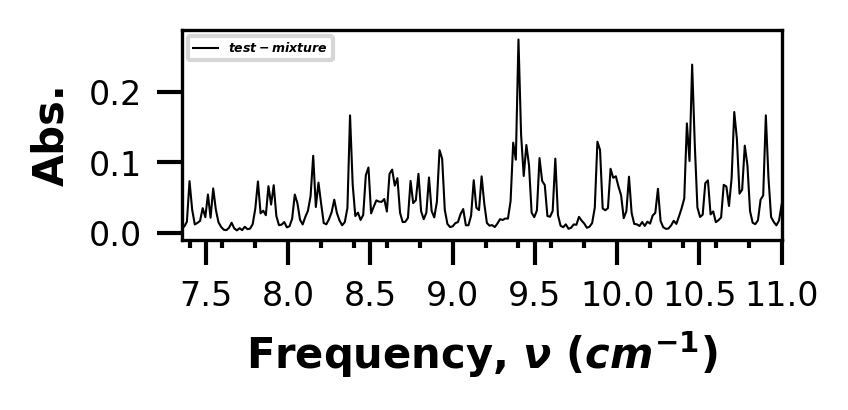

In [10]:
simple_plotter(m.frequencies,m.test_mixtures[0],linewidth=0.5,color='black',label='$test-mixture$', 
                   majorsize=6,minorsize=2,width=1, labelsize=8,legendsize=3, legendloc=2,  
                   labelpad=4,fontsize='medium',fontweight='bold',
                  xmajormplloc=0.5,xminormplloc=0.2, tickdirection='out')

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers

import tensorflow_docs.plots
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling



import pathlib
import shutil
import tempfile

logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

def get_callbacks(name):
    return [
    tfdocs.modeling.EpochDots(),
#     tf.keras.callbacks.EarlyStopping(monitor='val_SparseCatCrossentropy', patience=100),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

def get_optimizer():
    return tf.keras.optimizers.Adam()

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, STEPS_PER_EPOCH,  optimizer=None, max_epochs=200):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer=optimizer,
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=[
              tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True, name='SparseCatCrossentropy'),
              'accuracy'])

    model.summary()

    history = model.fit(
    x_train,
    y_train,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=(x_test, y_test),
    callbacks=get_callbacks(name),
    verbose=0)
    
    return history



def voc_net_style_model():


    model = models.Sequential()

    # C1 Convolutional Layer
    model.add(layers.Conv1D(filters = 3 , kernel_size=3, activation='relu', input_shape=(229, 1), name = 'C1') )

    # S2 Subsampling Layer
    model.add(layers.AveragePooling1D(pool_size = 2, strides = 2, padding = 'valid', name = 'S2'))
    
    # C3 Convolutional Layer
    model.add(layers.Conv1D(filters = 3 , kernel_size=3, activation='relu', name = 'C3') )

    # Flatten the CNN output to feed it with fully connected layers
    model.add(layers.Flatten())
    
    model.add(layers.Dense(48, activation='relu')) 
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12))  # number of dense layer would be equal to number of classess
    


    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=[
              tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True, name='SparseCatCrossentropy'),
              'accuracy'])
    
    model.summary()
    
    return model

In [34]:
X.shape

(1120, 229)

In [13]:
global_indices=range(0, X.shape[0])
print(global_indices)

range(0, 1116)


In [14]:
#split intro train and test set

#seeds used 123,237, 786
from sklearn.model_selection import train_test_split
 


TRAIN_SIZE=0.60
TEST_SIZE=1-TRAIN_SIZE

x_train, x_test, y_train, y_test, train_indices, test_indices = train_test_split(np.expand_dims(X,-1), y_ohe, global_indices, train_size=TRAIN_SIZE,
                                                   test_size=TEST_SIZE,
                                                   random_state=786
                                                   
                                                   )

print('X_train shape:', x_train.shape)
print('y_ohe_train shape:', y_train.shape)

print('X_test shape:', x_test.shape)
print('y_ohe_test shape:', y_test.shape)


# print("All:", np.bincount(y) / float(len(y))*100  )
# print("Training:", np.bincount(y_train) / float(len(y_train))*100  )
# print("Testing:", np.bincount(y_test) / float(len(y_test))*100  )


X_train shape: (669, 229, 1)
y_ohe_train shape: (669, 12)
X_test shape: (447, 229, 1)
y_ohe_test shape: (447, 12)


In [41]:
model = voc_net_style_model()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv1D)                  (None, 227, 3)            12        
_________________________________________________________________
S2 (AveragePooling1D)        (None, 113, 3)            0         
_________________________________________________________________
C3 (Conv1D)                  (None, 111, 3)            30        
_________________________________________________________________
flatten_4 (Flatten)          (None, 333)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 48)                16032     
_________________________________________________________________
dropout_4 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 12)               

In [42]:
# run on CPU for reproducibility, best epoch is 4.
with tf.device('/CPU:0'):
    stop_early = tf.keras.callbacks.EarlyStopping(monitor='SparseCatCrossentropy', patience=5)
    history = model.fit(x_train, y_train, epochs=4, validation_data=(x_test, y_test), callbacks=[stop_early])



Epoch 1/4


ValueError: in user code:

    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1712 sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4979 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4228 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/reshad812/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4133 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (384,)) should equal the shape of logits except for the last dimension (received (32, 12)).


In [44]:
y_train.shape

(672, 12)

In [65]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 1., 0.]])

In [107]:
from sklearn.datasets import make_multilabel_classification

# this will generate a random multi-label dataset
p, q = make_multilabel_classification(sparse = False, n_features=229, n_classes=12, n_labels=5, allow_unlabeled = False)

In [111]:
q[1]

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [115]:
np.squeeze(x_train).shape

(672, 229)

In [116]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
# classifier.fit(p, q)
classifier.fit(np.squeeze(x_train), y_train)

# predict
predictions = classifier.predict(np.squeeze(x_test))

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)


0.12723214285714285

https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification


Audio classification multilabel
https://arxiv.org/pdf/1707.04916.pdf

In [119]:
# how many multi-labels are there

np.unique(y_train.rows).shape, np.unique(y_test.rows).shape

AttributeError: 'numpy.ndarray' object has no attribute 'rows'

In [121]:
from skmultilearn.dataset import load_dataset


In [122]:
p_train, q_train, feature_names, label_names = load_dataset('emotions', 'train')
p_test, q_test, _, _ =load_dataset('emotions', 'test')

emotions:train - does not exists downloading
Downloaded emotions-train
emotions:test - does not exists downloading
Downloaded emotions-test


In [123]:
p_train.shape

(391, 72)

In [131]:
q_test[0].data

array([list([1, 1, 1])], dtype=object)

In [132]:
q_train.shape, q_test.shape

((391, 6), (202, 6))

In [139]:
np.unique(q_train.rows).shape, np.unique(q_test.rows).shape


((26,), (21,))

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD,Adam

model = Sequential()
model.add(Dense(1500, activation='relu', input_dim=np.squeeze(x_train).shape[1]))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01, decay=1e-6))

history = model.fit(np.squeeze(x_train), y_train, epochs=50, batch_size=50)

preds = model.predict(np.squeeze(x_test))
preds[preds>=0.5] = 1
preds[preds<0.5] = 0
# score = compare preds and y_test

InternalError: Could not synchronize CUDA stream: CUDA_ERROR_ILLEGAL_ADDRESS: an illegal memory access was encountered

In [20]:
history.history.keys()

dict_keys(['loss'])

In [19]:
print(preds[0])
print(y_test[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]
